In [2]:
import pandas as pd
import numpy as np

In [71]:
pd.set_option('display.max_columns', None)

In [4]:
service_fault_codes = pd.read_excel('Service Fault Codes_1_0_0_167.xlsx')
faults = pd.read_csv('J1939Faults.csv', low_memory=False)
diagnostics = pd.read_csv('VehicleDiagnosticOnboardData.csv', low_memory=False)

/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Data Validation extension is not supported and will be removed
  for idx, row in parser.parse():


In [5]:
# Define the service locations
service_locations = [(36.0666667, -86.4347222), (35.5883333, -86.4438888), (36.1950, -83.174722)]

# Filter out faults occurring within 2 miles of service locations
for loc in service_locations:
    lat_mile = 2/69 # Convert 2 miles to degrees of latitude
    lon_mile = 1/(69*np.cos(np.radians(loc[0]))) * 2 # Convert 2 miles to degrees of longitude at the given latitude
    faults = faults[(np.abs(faults['Latitude'] - loc[0]) > lat_mile) | (np.abs(faults['Longitude'] - loc[1]) > lon_mile)]
faults = faults[faults['EquipmentID'].str.len() <= 5]
faults

,RecordID,ESS_Id,EventTimeStamp,eventDescription,actionDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,fmi,active,activeTransitionCount,faultValue,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp
0,1,990349,2015-02-21 10:47:13.000,Low (Severity Low) Engine Coolant Level,NaN,unknown,unknown,unknown,unknown,0,111,17,True,2,NaN,1439,105354361,38.857638,-84.626851,2015-02-21 11:34:25.000
1,2,990360,2015-02-21 11:34:34.000,NaN,NaN,unknown,unknown,unknown,unknown,11,629,12,True,127,NaN,1439,105354361,38.857638,-84.626851,2015-02-21 11:35:10.000
2,3,990364,2015-02-21 11:35:31.000,Incorrect Data Steering Wheel Angle,NaN,unknown,unknown,unknown,unknown,11,1807,2,False,127,NaN,1369,105336226,41.421250,-87.767361,2015-02-21 11:35:26.000
3,4,990370,2015-02-21 11:35:33.000,Incorrect Data Steering Wheel Angle,NaN,unknown,unknown,unknown,unknown,11,1807,2,True,127,NaN,1369,105336226,41.421018,-87.767361,2015-02-21 11:36:08.000
4,5,990416,2015-02-21 11:39:41.000,NaN,NaN,22281684P01*22357957P01*22362082P01*,13063430,0USA13_13_0415_2238A,VOLVO,0,4364,17,False,2,NaN,1674,105427130,38.416481,-89.442638,2015-02-21 11:39:37.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187330,1248454,123904424,2020-03-06 14:00:26.000,Low (Severity Low) Catalyst Tank Level,NaN,04384413*22383729*082218154102*60701732*G1*BGT*,80156139,6X1u17D1500000000,CMMNS,0,1761,17,False,3,NaN,2282,105439740,37.094768,-85.897407,2020-03-06 14:00:21.000
1187331,1248455,123905139,2020-03-06 14:04:23.000,Condition Exists Engine Protection Torque Derate,NaN,04358814*06099720*030816202706*09400153*G1*BDR*,79932020,6X1u13D1500000000,CMMNS,0,1569,31,True,5,NaN,1994,105354084,34.390740,-79.461805,2020-03-06 14:04:59.000
1187332,1248456,123905996,2020-03-06 14:13:38.000,Abnormal Rate of Change Aftertreatment 1 Intak...,NaN,05317106*05100987*050719120655*09401585*G1*BDR*,79880653,6X1u13D1500000000,CMMNS,0,3216,10,True,1,NaN,1850,105336308,34.430370,-84.920509,2020-03-06 14:14:14.000
1187333,1248457,123906113,2020-03-06 14:14:13.000,Low (Severity Medium) Engine Coolant Level,NaN,04384413*22544852*090619141107*60701756*G1*BGT*,NaN,NaN,NaN,0,111,18,True,8,NaN,2377,108605700,35.030925,-85.321527,2020-03-06 14:14:49.000


In [6]:
wide_diag = diagnostics.pivot(index='FaultId', columns='Name', values='Value')

In [7]:
fault_diag = pd.merge(left = faults,
         right = wide_diag,
         left_on = 'RecordID',
         right_on = 'FaultId'
        )
fault_diag

,RecordID,ESS_Id,EventTimeStamp,eventDescription,actionDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,fmi,active,activeTransitionCount,faultValue,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp,AcceleratorPedal,BarometricPressure,CruiseControlActive,CruiseControlSetSpeed,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure
0,1,990349,2015-02-21 10:47:13.000,Low (Severity Low) Engine Coolant Level,NaN,unknown,unknown,unknown,unknown,0,111,17,True,2,NaN,1439,105354361,38.857638,-84.626851,2015-02-21 11:34:25.000,0,14.21,False,66.48672,423178.7,100.4,11,0,96.74375,0,1632.2,43.2,12300.907429328,0,NaN,False,78.8,1023,True,NaN,0,3276.75,NaN,0
1,2,990360,2015-02-21 11:34:34.000,NaN,NaN,unknown,unknown,unknown,unknown,11,629,12,True,127,NaN,1439,105354361,38.857638,-84.626851,2015-02-21 11:35:10.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,1279,NaN,NaN,NaN,NaN,NaN,NaN
2,3,990364,2015-02-21 11:35:31.000,Incorrect Data Steering Wheel Angle,NaN,unknown,unknown,unknown,unknown,11,1807,2,False,127,NaN,1369,105336226,41.421250,-87.767361,2015-02-21 11:35:26.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1279,NaN,NaN,NaN,NaN,NaN,NaN
3,4,990370,2015-02-21 11:35:33.000,Incorrect Data Steering Wheel Angle,NaN,unknown,unknown,unknown,unknown,11,1807,2,True,127,NaN,1369,105336226,41.421018,-87.767361,2015-02-21 11:36:08.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,1279,NaN,NaN,NaN,NaN,NaN,NaN
4,5,990416,2015-02-21 11:39:41.000,NaN,NaN,22281684P01*22357957P01*22362082P01*,13063430,0USA13_13_0415_2238A,VOLVO,0,4364,17,False,2,NaN,1674,105427130,38.416481,-89.442638,2015-02-21 11:39:37.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16639,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051207,1248454,123904424,2020-03-06 14:00:26.000,Low (Severity Low) Catalyst Tank Level,NaN,04384413*22383729*082218154102*60701732*G1*BGT*,80156139,6X1u17D1500000000,CMMNS,0,1761,17,False,3,NaN,2282,105439740,37.094768,-85.897407,2020-03-06 14:00:21.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1023,NaN,NaN,NaN,NaN,NaN,NaN
1051208,1248455,123905139,2020-03-06 14:04:23.000,Condition Exists Engine Protection Torque Derate,NaN,04358814*06099720*030816202706*09400153*G1*BDR*,79932020,6X1u13D1500000000,CMMNS,0,1569,31,True,5,NaN,1994,105354084,34.390740,-79.461805,2020-03-06 14:04:59.000,100,14.5,True,64.6226,423937.9,185,51,37.12,211.4937,1310.25,10722.7,96.4,58979.184415546,7.647805,32,True,98.6,18431,False,NaN,65.01096,NaN,73.2,7.83
1051209,1248456,123905996,2020-03-06 14:13:38.000,Abnormal Rate of Change Aftertreatment 1 Intak...,NaN,05317106*05100987*050719120655*09401585*G1*BDR*,79880653,6X1u13D1500000000,CMMNS,0,3216,10,True,1,NaN,1850,105336308,34.430370,-84.920509,2020-03-06 14:14:14.000,0,14.355,True,66.48672,465925.4,186.8,62,41.18,212.8438,1340.75,9326.75,100,65080.10587046,8.995086,NaN,True,91.4,17407,NaN,NaN,66.5741,NaN,100,6.96
1051210,1248457,123906113,2020-03-06 14:14:13.000,Low (Severity Medium) Engine Coolant Level,NaN,04384413*22544852*090619141107*60701756*G1*BGT*,NaN,NaN,NaN,0,111,18,True,8,NaN,2377,108605700,35.030925,-85.321527,2020-03-06 14:14:49.000,1.6,14.4275,False,67.72946,28606.65625,181.4,0,27.26,221.7312,863.25,586.75,23.6,4042.49282573,0,NaN,True,100.4,1023,False,NaN,11.84489,14.1,100,1.74


In [8]:
derates=fault_diag.loc[fault_diag['spn'].isin([5246, 1569])]
full_derate = derates.loc[derates['spn'].isin([5246])]
full_derate

,RecordID,ESS_Id,EventTimeStamp,eventDescription,actionDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,fmi,active,activeTransitionCount,faultValue,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp,AcceleratorPedal,BarometricPressure,CruiseControlActive,CruiseControlSetSpeed,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure
1786,2090,1011009,2015-02-23 05:05:44.000,NaN,NaN,05290170*03015749*051914190353*09400015*G1*BDR*,79642446,6X1u13D1500000000,CMMNS,0,5246,0,True,1,NaN,1630,105329900,40.733009,-74.087777,2015-02-23 05:08:23.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4645.45,NaN,33470.466902374,NaN,NaN,False,NaN,22527,NaN,NaN,NaN,NaN,NaN,NaN
2574,2972,1026305,2015-02-23 15:54:22.000,NaN,NaN,unknown,unknown,unknown,unknown,0,5246,0,True,1,NaN,1487,105369355,28.077361,-81.897083,2015-02-23 15:54:58.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,22527,NaN,NaN,NaN,NaN,NaN,NaN
5115,5714,1070646,2015-02-25 13:53:08.000,NaN,NaN,unknown,unknown,unknown,unknown,0,5246,0,True,1,NaN,1329,105400037,39.399583,-82.974768,2015-02-25 13:56:31.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,22527,NaN,NaN,NaN,NaN,NaN,NaN
5209,5810,1071907,2015-02-25 14:47:00.000,NaN,NaN,unknown,unknown,unknown,unknown,0,5246,0,False,1,NaN,1329,105400037,39.399629,-82.974814,2015-02-25 14:46:56.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17407,NaN,NaN,NaN,NaN,NaN,NaN
5922,6535,1097942,2015-02-26 22:24:29.000,NaN,NaN,04993120*00021657*082113134117*07700053*I0*BBZ*,79466573,6X1u10D1500000000,CMMNS,0,5246,0,True,1,NaN,1419,105355995,37.596805,-85.865555,2015-02-26 22:25:05.000,NaN,14.5,False,64.6226,441699.6,185,10,20.3,198.1625,648.125,9087.95,57.2,69605.769379298,0.6340149,NaN,True,140,22527,NaN,NaN,0,3276.75,NaN,0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044449,1239564,119961467,2020-02-06 08:03:09.000,NaN,NaN,04358814*06005963*051718174436*09401683*G1*BDR*,79897320,6X1u13D1500000000,CMMNS,0,5246,0,False,1,NaN,1854,105385876,35.943472,-83.823240,2020-02-06 08:03:05.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17407,NaN,NaN,NaN,NaN,NaN,NaN
1046465,1241841,120905759,2020-02-13 13:32:39.000,NaN,NaN,04358814*06026985*051718174436*09401683*G1*BDR*,79903054,6X1u13D1500000000,CMMNS,0,5246,0,True,1,NaN,1872,105301976,35.707268,-81.397037,2020-02-13 13:33:15.000,0,13.9925,False,57.78752,477486.8,197.6,10,21.46,204.9688,599.5,9344.3,72.4,63966.356499228,0.4623025,NaN,True,120.2,22527,True,NaN,0,NaN,100,0.58
1046479,1241858,120910417,2020-02-13 14:01:40.000,NaN,NaN,04358814*06026985*051718174436*09401683*G1*BDR*,79903054,6X1u13D1500000000,CMMNS,0,5246,0,False,1,NaN,1872,105301976,35.708101,-81.395648,2020-02-13 13:59:51.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1023,NaN,NaN,NaN,NaN,NaN,NaN
1046712,1242137,121038018,2020-02-14 11:21:54.000,NaN,NaN,NaN,NaN,NaN,NaN,49,5246,19,True,88,NaN,302,105418777,38.349490,-85.708425,2020-02-14 11:22:30.000,0,14.79,False,0,334736.2,17.6,51,84.68,18.10625,651.5,11554.2,100,393.220099402,2.892693,19.4,True,26.6,255,True,NaN,0,NaN,0,0.58


In [9]:
# Extract unique EquipmentID numbers from full_derate
unique_equip_ids = full_derate['EquipmentID'].unique()

# Filter rows in fault_diag based on unique_equip_ids
fault_diag_filtered = fault_diag[fault_diag['EquipmentID'].isin(unique_equip_ids)]
fault_diag_filtered

,RecordID,ESS_Id,EventTimeStamp,eventDescription,actionDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,fmi,active,activeTransitionCount,faultValue,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp,AcceleratorPedal,BarometricPressure,CruiseControlActive,CruiseControlSetSpeed,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure
5,6,990431,2015-02-21 11:40:22.000,Low (Severity Low) Engine Coolant Level,NaN,04993120*00025921*082113134117*07700053*I0*BBZ*,79466580,6X1u10D1500000000,CMMNS,0,111,17,True,1,NaN,1417,105438630,33.043564,-96.179722,2015-02-21 11:40:59.000,48,14.4275,False,64.6226,470381.4,181.4,30,38.28,196.5313,1514.5,9480,44,70349.809963756,4.583399,NaN,True,111.2,1023,NaN,NaN,13.6022,3276.75,NaN,6.67
9,10,990446,2015-02-21 11:41:55.000,Low (Severity Low) Engine Coolant Level,NaN,04993120*00025921*082113134117*07700053*I0*BBZ*,79466580,6X1u10D1500000000,CMMNS,0,111,17,False,1,NaN,1417,105438630,33.039953,-96.182592,2015-02-21 11:41:51.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1023,NaN,NaN,NaN,NaN,NaN,NaN
10,11,990459,2015-02-21 11:42:19.000,Low (Severity Low) Engine Coolant Level,NaN,04993120*00184697*060712145341*07700027*I0*BBZ*,79618845,6X1u10D1500000000,CMMNS,0,111,17,True,1,NaN,1582,105410980,40.158055,-80.151018,2015-02-21 11:42:55.000,NaN,14.1375,False,64.6226,257885.9,181.4,80,34.22,218.975,1382.375,5085.35,42.8,37724.957799834,13.72378,NaN,True,78.8,1023,NaN,NaN,64.82649,3276.75,NaN,17.69
13,14,990470,2015-02-21 11:43:40.000,Low (Severity Low) Engine Coolant Level,NaN,04993120*00184697*060712145341*07700027*I0*BBZ*,79618845,6X1u10D1500000000,CMMNS,0,111,17,False,1,NaN,1582,105410980,40.161944,-80.161018,2015-02-21 11:43:36.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1023,NaN,NaN,NaN,NaN,NaN,NaN
15,16,990495,2015-02-21 11:45:06.000,Low (Severity Low) Engine Coolant Level,NaN,04993120*00190002*082113134117*07700053*I0*BBZ*,79623056,6X1u10D1500000000,CMMNS,0,111,17,False,1,NaN,1601,105430420,38.272037,-78.937129,2015-02-21 11:45:02.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17407,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051183,1248429,123886552,2020-03-06 12:11:54.000,High Voltage (Left Fuel Level Sensor),NaN,NaN,NaN,CECU3B-NAMUX4,PACCR,49,829,3,False,126,NaN,1853,105376821,26.079814,-80.123518,2020-03-06 12:11:49.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65535,NaN,NaN,NaN,NaN,NaN,NaN
1051185,1248431,123891846,2020-03-06 12:20:36.000,High Voltage (Fuel Level),NaN,NaN,NaN,CECU3B-NAMUX4,PACCR,49,96,3,True,126,NaN,1853,105376821,26.078518,-80.122268,2020-03-06 12:41:17.000,0,14.645,False,66.48672,443434.9,186.8,12,22.62,203.7875,601,10755.85,54,62063.92146675,0.7132668,32,True,143.6,1279,True,NaN,0,NaN,100,0.58
1051186,1248432,123891847,2020-03-06 12:20:36.000,High Voltage (Left Fuel Level Sensor),NaN,NaN,NaN,CECU3B-NAMUX4,PACCR,49,829,3,True,126,NaN,1853,105376821,26.078518,-80.122268,2020-03-06 12:41:17.000,0,14.645,False,66.48672,443434.9,186.8,12,22.62,203.7875,601,10755.85,54,62063.92146675,0.7132668,32,True,143.6,1279,True,NaN,0,NaN,100,0.58
1051192,1248438,123893761,2020-03-06 12:51:53.000,High Voltage (Fuel Level),NaN,NaN,NaN,CECU3B-NAMUX4,PACCR,49,96,3,False,126,NaN,1853,105376821,26.078888,-80.122361,2020-03-06 12:51:49.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65535,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
fault_diag_filtered = fault_diag_filtered[fault_diag_filtered['active'] == True]
fault_diag_filtered = fault_diag_filtered.sort_values(by=['EquipmentID','EventTimeStamp'], ascending=[True, True])
fault_diag_filtered = fault_diag_filtered.drop(columns=['ParkingBrake','LocationTimeStamp','active','CruiseControlActive', 'CruiseControlSetSpeed', 'MCTNumber', 'ecuSoftwareVersion', 'ecuSerialNumber','actionDescription', 'faultValue', 'ServiceDistance', 'SwitchedBatteryVoltage'])
fault_diag_filtered

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure
5114,5713,1070644,2015-02-25 13:53:08.000,NaN,unknown,unknown,0,4344,5,1,1329,39.399583,-82.974768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,22527,NaN,NaN,NaN
5115,5714,1070646,2015-02-25 13:53:08.000,NaN,unknown,unknown,0,5246,0,1,1329,39.399583,-82.974768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,22527,NaN,NaN,NaN
5116,5715,1070647,2015-02-25 13:53:08.000,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,1569,31,1,1329,39.399583,-82.974768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,22527,NaN,NaN,NaN
5117,5716,1070648,2015-02-25 13:53:08.000,Low (Severity Medium) Catalyst Tank Temperature,unknown,unknown,0,3031,18,1,1329,39.399583,-82.974768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,22527,NaN,NaN,NaN
5296,5899,1073059,2015-02-25 15:38:07.000,High (Severity Low) Aftertreatment 1 Particula...,unknown,unknown,0,3242,15,1,1329,39.399583,-82.974861,0,14.2825,483744.4,204.8,34,22.62,220.7188,898.375,9337,70,72585.630125858,5.111745,NaN,True,100.4,17407,0,NaN,13.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931529,1088628,70128153,2018-12-03 10:37:20.000,High Voltage (Left Fuel Level Sensor),unknown,unknown,49,829,3,126,306,36.319259,-86.705000,0,14.4275,312451.9,192.2,14,22.62,197.0375,600.25,9910.9,0,43539.384664354,0.5679717,32,True,156.2,1279,0,0,0.29
931528,1088627,70128152,2018-12-03 10:37:31.000,High Voltage (Fuel Level),unknown,unknown,49,96,3,126,306,36.319259,-86.705000,0,14.4275,312451.9,185,14,22.04,201.4812,599.625,9910.95,0,43539.384664354,0.5679717,32,True,154.4,1279,0,0,0.58
946239,1108656,74595473,2019-01-18 07:56:44.000,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,11,639,2,127,306,36.183287,-86.274675,28,14.4275,317407.4,183.2,20,35.38,204.8562,988.875,10177.25,69.2,44309.182023882,1.902045,32,True,95,1279,4.796209,0,0.58
961868,1127904,78803617,2019-02-28 08:27:34.000,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u13D1500000000,CMMNS,0,3216,9,1,306,35.992685,-86.538287,0,14.355,320867.1,181.4,0,37.7,210.9875,1173.375,10429.75,83.6,44890.888882386,0,32,True,80.6,17407,42.00081,0,2.9


In [12]:
from datetime import datetime
fault_diag_filtered['EventTimeStamp'] = pd.to_datetime(fault_diag_filtered['EventTimeStamp'])
fault_diag_filtered = fault_diag_filtered.replace(',', '.', regex=True)

In [13]:
# Create a groupby object using the 'EquipmentID' column
groups = fault_diag_filtered.groupby('EquipmentID')

# Define a function to apply to each group to interpolate missing values using ffill
def interpolate_group(group):
    return group.ffill()

# Apply the function to each group and concatenate the results back into a single DataFrame
interpolated = pd.concat([interpolate_group(group) for _, group in groups])
interpolated

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure
5114,5713,1070644,2015-02-25 13:53:08,NaN,unknown,unknown,0,4344,5,1,1329,39.399583,-82.974768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,22527,NaN,NaN,NaN
5115,5714,1070646,2015-02-25 13:53:08,NaN,unknown,unknown,0,5246,0,1,1329,39.399583,-82.974768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,22527,NaN,NaN,NaN
5116,5715,1070647,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,1569,31,1,1329,39.399583,-82.974768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,22527,NaN,NaN,NaN
5117,5716,1070648,2015-02-25 13:53:08,Low (Severity Medium) Catalyst Tank Temperature,unknown,unknown,0,3031,18,1,1329,39.399583,-82.974768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,22527,NaN,NaN,NaN
5296,5899,1073059,2015-02-25 15:38:07,High (Severity Low) Aftertreatment 1 Particula...,unknown,unknown,0,3242,15,1,1329,39.399583,-82.974861,0,14.2825,483744.4,204.8,34,22.62,220.7188,898.375,9337,70,72585.630125858,5.111745,NaN,True,100.4,17407,0,NaN,13.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931529,1088628,70128153,2018-12-03 10:37:20,High Voltage (Left Fuel Level Sensor),unknown,unknown,49,829,3,126,306,36.319259,-86.705000,0,14.4275,312451.9,192.2,14,22.62,197.0375,600.25,9910.9,0,43539.384664354,0.5679717,32,True,156.2,1279,0,0,0.29
931528,1088627,70128152,2018-12-03 10:37:31,High Voltage (Fuel Level),unknown,unknown,49,96,3,126,306,36.319259,-86.705000,0,14.4275,312451.9,185,14,22.04,201.4812,599.625,9910.95,0,43539.384664354,0.5679717,32,True,154.4,1279,0,0,0.58
946239,1108656,74595473,2019-01-18 07:56:44,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,11,639,2,127,306,36.183287,-86.274675,28,14.4275,317407.4,183.2,20,35.38,204.8562,988.875,10177.25,69.2,44309.182023882,1.902045,32,True,95,1279,4.796209,0,0.58
961868,1127904,78803617,2019-02-28 08:27:34,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u13D1500000000,CMMNS,0,3216,9,1,306,35.992685,-86.538287,0,14.355,320867.1,181.4,0,37.7,210.9875,1173.375,10429.75,83.6,44890.888882386,0,32,True,80.6,17407,42.00081,0,2.9


In [14]:
# Create a groupby object using the 'EquipmentID' column
groups = interpolated.groupby('EquipmentID')

# Define a function to apply to each group to interpolate missing values using ffill
def interpolate_group(group):
    return group.bfill()

# Apply the function to each group and concatenate the results back into a single DataFrame
interpolated_bfill = pd.concat([interpolate_group(group) for _, group in groups])
interpolated_bfill

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure
5114,5713,1070644,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,4344,5,1,1329,39.399583,-82.974768,0,14.2825,483744.4,204.8,34,22.62,220.7188,898.375,9337,70,72585.630125858,5.111745,NaN,True,100.4,22527,0,NaN,13.63
5115,5714,1070646,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,5246,0,1,1329,39.399583,-82.974768,0,14.2825,483744.4,204.8,34,22.62,220.7188,898.375,9337,70,72585.630125858,5.111745,NaN,True,100.4,22527,0,NaN,13.63
5116,5715,1070647,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,1569,31,1,1329,39.399583,-82.974768,0,14.2825,483744.4,204.8,34,22.62,220.7188,898.375,9337,70,72585.630125858,5.111745,NaN,True,100.4,22527,0,NaN,13.63
5117,5716,1070648,2015-02-25 13:53:08,Low (Severity Medium) Catalyst Tank Temperature,unknown,unknown,0,3031,18,1,1329,39.399583,-82.974768,0,14.2825,483744.4,204.8,34,22.62,220.7188,898.375,9337,70,72585.630125858,5.111745,NaN,True,100.4,22527,0,NaN,13.63
5296,5899,1073059,2015-02-25 15:38:07,High (Severity Low) Aftertreatment 1 Particula...,unknown,unknown,0,3242,15,1,1329,39.399583,-82.974861,0,14.2825,483744.4,204.8,34,22.62,220.7188,898.375,9337,70,72585.630125858,5.111745,NaN,True,100.4,17407,0,NaN,13.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931529,1088628,70128153,2018-12-03 10:37:20,High Voltage (Left Fuel Level Sensor),unknown,unknown,49,829,3,126,306,36.319259,-86.705000,0,14.4275,312451.9,192.2,14,22.62,197.0375,600.25,9910.9,0,43539.384664354,0.5679717,32,True,156.2,1279,0,0,0.29
931528,1088627,70128152,2018-12-03 10:37:31,High Voltage (Fuel Level),unknown,unknown,49,96,3,126,306,36.319259,-86.705000,0,14.4275,312451.9,185,14,22.04,201.4812,599.625,9910.95,0,43539.384664354,0.5679717,32,True,154.4,1279,0,0,0.58
946239,1108656,74595473,2019-01-18 07:56:44,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,11,639,2,127,306,36.183287,-86.274675,28,14.4275,317407.4,183.2,20,35.38,204.8562,988.875,10177.25,69.2,44309.182023882,1.902045,32,True,95,1279,4.796209,0,0.58
961868,1127904,78803617,2019-02-28 08:27:34,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u13D1500000000,CMMNS,0,3216,9,1,306,35.992685,-86.538287,0,14.355,320867.1,181.4,0,37.7,210.9875,1173.375,10429.75,83.6,44890.888882386,0,32,True,80.6,17407,42.00081,0,2.9


In [15]:
interpolated_bfill = interpolated_bfill.bfill()

# Define columns to impute with mode
cols_to_impute = ['ecuModel', 'ecuMake', 'AcceleratorPedal', 'EngineTimeLtd', 'FuelLevel', 'FuelTemperature', 'Throttle']

# Group by EquipmentID and impute missing values with mode
grouped = interpolated_bfill.groupby('EquipmentID')[cols_to_impute].apply(lambda x: x.fillna(x.mode().iloc[0]))

# Update the original DataFrame with imputed values
interpolated_bfill[cols_to_impute] = grouped[cols_to_impute]
interpolated_bfill

/var/folders/y2/1hbr5nhn5g74yh6sf24m5s9xr861g0/T/ipykernel_99277/2462148358.py:7: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  grouped = interpolated_bfill.groupby('EquipmentID')[cols_to_impute].apply(lambda x: x.fillna(x.mode().iloc[0]))


,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure
5114,5713,1070644,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,4344,5,1,1329,39.399583,-82.974768,0,14.2825,483744.4,204.8,34,22.62,220.7188,898.375,9337,70,72585.630125858,5.111745,183.2,True,100.4,22527,0,0,13.63
5115,5714,1070646,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,5246,0,1,1329,39.399583,-82.974768,0,14.2825,483744.4,204.8,34,22.62,220.7188,898.375,9337,70,72585.630125858,5.111745,183.2,True,100.4,22527,0,0,13.63
5116,5715,1070647,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,1569,31,1,1329,39.399583,-82.974768,0,14.2825,483744.4,204.8,34,22.62,220.7188,898.375,9337,70,72585.630125858,5.111745,183.2,True,100.4,22527,0,0,13.63
5117,5716,1070648,2015-02-25 13:53:08,Low (Severity Medium) Catalyst Tank Temperature,unknown,unknown,0,3031,18,1,1329,39.399583,-82.974768,0,14.2825,483744.4,204.8,34,22.62,220.7188,898.375,9337,70,72585.630125858,5.111745,183.2,True,100.4,22527,0,0,13.63
5296,5899,1073059,2015-02-25 15:38:07,High (Severity Low) Aftertreatment 1 Particula...,unknown,unknown,0,3242,15,1,1329,39.399583,-82.974861,0,14.2825,483744.4,204.8,34,22.62,220.7188,898.375,9337,70,72585.630125858,5.111745,183.2,True,100.4,17407,0,0,13.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931529,1088628,70128153,2018-12-03 10:37:20,High Voltage (Left Fuel Level Sensor),unknown,unknown,49,829,3,126,306,36.319259,-86.705000,0,14.4275,312451.9,192.2,14,22.62,197.0375,600.25,9910.9,0,43539.384664354,0.5679717,32,True,156.2,1279,0,0,0.29
931528,1088627,70128152,2018-12-03 10:37:31,High Voltage (Fuel Level),unknown,unknown,49,96,3,126,306,36.319259,-86.705000,0,14.4275,312451.9,185,14,22.04,201.4812,599.625,9910.95,0,43539.384664354,0.5679717,32,True,154.4,1279,0,0,0.58
946239,1108656,74595473,2019-01-18 07:56:44,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,11,639,2,127,306,36.183287,-86.274675,28,14.4275,317407.4,183.2,20,35.38,204.8562,988.875,10177.25,69.2,44309.182023882,1.902045,32,True,95,1279,4.796209,0,0.58
961868,1127904,78803617,2019-02-28 08:27:34,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u13D1500000000,CMMNS,0,3216,9,1,306,35.992685,-86.538287,0,14.355,320867.1,181.4,0,37.7,210.9875,1173.375,10429.75,83.6,44890.888882386,0,32,True,80.6,17407,42.00081,0,2.9


In [16]:
int_cols = ["AcceleratorPedal", "BarometricPressure", "DistanceLtd", "EngineCoolantTemperature", "EngineLoad",
            "EngineOilPressure", "EngineOilTemperature", "EngineRpm", "EngineTimeLtd", "FuelLevel", "FuelLtd",
            "FuelRate", "FuelTemperature", "IntakeManifoldTemperature", "LampStatus", "Speed", "Throttle",
            "TurboBoostPressure"]

# convert columns to int64
interpolated_bfill[int_cols] = interpolated_bfill[int_cols].astype("float")

In [17]:
equipment_ids_to_drop = ['302', '1878', '1585', '1961', '2007']
interpolated_drop = interpolated_bfill[~interpolated_bfill['EquipmentID'].isin(equipment_ids_to_drop)]
interpolated_drop

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure
5114,5713,1070644,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,4344,5,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527.0,0.000000,0.0,13.63
5115,5714,1070646,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,5246,0,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527.0,0.000000,0.0,13.63
5116,5715,1070647,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,1569,31,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527.0,0.000000,0.0,13.63
5117,5716,1070648,2015-02-25 13:53:08,Low (Severity Medium) Catalyst Tank Temperature,unknown,unknown,0,3031,18,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527.0,0.000000,0.0,13.63
5296,5899,1073059,2015-02-25 15:38:07,High (Severity Low) Aftertreatment 1 Particula...,unknown,unknown,0,3242,15,1,1329,39.399583,-82.974861,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,17407.0,0.000000,0.0,13.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931529,1088628,70128153,2018-12-03 10:37:20,High Voltage (Left Fuel Level Sensor),unknown,unknown,49,829,3,126,306,36.319259,-86.705000,0.0,14.4275,312451.9,192.2,14.0,22.62,197.0375,600.250,9910.90,0.0,43539.384664,0.567972,32.0,True,156.2,1279.0,0.000000,0.0,0.29
931528,1088627,70128152,2018-12-03 10:37:31,High Voltage (Fuel Level),unknown,unknown,49,96,3,126,306,36.319259,-86.705000,0.0,14.4275,312451.9,185.0,14.0,22.04,201.4812,599.625,9910.95,0.0,43539.384664,0.567972,32.0,True,154.4,1279.0,0.000000,0.0,0.58
946239,1108656,74595473,2019-01-18 07:56:44,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,11,639,2,127,306,36.183287,-86.274675,28.0,14.4275,317407.4,183.2,20.0,35.38,204.8562,988.875,10177.25,69.2,44309.182024,1.902045,32.0,True,95.0,1279.0,4.796209,0.0,0.58
961868,1127904,78803617,2019-02-28 08:27:34,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u13D1500000000,CMMNS,0,3216,9,1,306,35.992685,-86.538287,0.0,14.3550,320867.1,181.4,0.0,37.70,210.9875,1173.375,10429.75,83.6,44890.888882,0.000000,32.0,True,80.6,17407.0,42.000810,0.0,2.90


In [18]:
# Code for overall averages
def mileage_to_spn(interpolated_drop):
    result = []
    for eq_id, eq_df in interpolated_drop.groupby('EquipmentID'):
        spn_mileage = eq_df.loc[eq_df['spn'] == 5246, 'DistanceLtd'].iloc[0]
        result.append((eq_id, spn_mileage))
    return result

mileage_to_spn_df = pd.DataFrame(mileage_to_spn(interpolated_drop), columns=['EquipmentID', 'mileage_to_derate'])
# calculate the mean excluding rows where value is zero
overall_avg_mileage = mileage_to_spn_df.loc[mileage_to_spn_df['mileage_to_derate'] != 0, 'mileage_to_derate'].mean()
mileage_to_spn_df['overall_avg_mileage'] = overall_avg_mileage

def time_to_spn(interpolated_drop):
    result = []
    for eq_id, eq_df in interpolated_drop.groupby('EquipmentID'):
        earliest_timestamp = eq_df['EventTimeStamp'].iloc[0]
        spn_timestamp = eq_df.loc[eq_df['spn'] == 5246, 'EventTimeStamp'].iloc[0]
        result.append((eq_id, spn_timestamp - earliest_timestamp))
    return result

time_to_spn_df = pd.DataFrame(time_to_spn(interpolated_drop), columns=['EquipmentID', 'time_to_derate'])
overall_avg_time = time_to_spn_df.loc[time_to_spn_df['time_to_derate'] != pd.Timedelta(0), 'time_to_derate'].mean()
time_to_spn_df['overall_avg_time'] = overall_avg_time

def eng_time_to_spn(interpolated_drop):
    result = []
    for eq_id, eq_df in interpolated_drop.groupby('EquipmentID'):
        spn_eng_time = eq_df.loc[eq_df['spn'] == 5246, 'EngineTimeLtd'].iloc[0]
        result.append((eq_id, spn_eng_time))
    return result

eng_time_to_spn_df = pd.DataFrame(eng_time_to_spn(interpolated_drop), columns=['EquipmentID', 'eng_time_to_derate'])
overall_avg_eng_time = eng_time_to_spn_df.loc[eng_time_to_spn_df['eng_time_to_derate'] != 0, 'eng_time_to_derate'].mean()
eng_time_to_spn_df['overall_avg_eng_time'] = overall_avg_eng_time

def fuel_time_to_spn(interpolated_drop):
    result = []
    for eq_id, eq_df in interpolated_drop.groupby('EquipmentID'):
        spn_fuel_time = eq_df.loc[eq_df['spn'] == 5246, 'FuelLtd'].iloc[0]
        result.append((eq_id, spn_fuel_time))
    return result

fuel_time_to_spn_df = pd.DataFrame(fuel_time_to_spn(interpolated_drop), columns=['EquipmentID', 'fuel_time_to_derate'])
overall_avg_fuel_time = fuel_time_to_spn_df.loc[fuel_time_to_spn_df['fuel_time_to_derate'] != 0, 'fuel_time_to_derate'].mean()
fuel_time_to_spn_df['overall_avg_fuel_time'] = overall_avg_fuel_time

def engine_oil(interpolated_drop):
    result = []
    for eq_id, eq_df in interpolated_drop.groupby('EquipmentID'):
        engine_oil_temp = eq_df.loc[eq_df['spn'] == 5246, 'EngineOilTemperature'].iloc[0]
        result.append((eq_id, engine_oil_temp))
    return result

engine_oil_to_spn_df = pd.DataFrame(engine_oil(interpolated_drop), columns=['EquipmentID', 'oil_temp_at_derate'])
overall_avg_oil_temp = engine_oil_to_spn_df.loc[engine_oil_to_spn_df['oil_temp_at_derate'] != 0, 'oil_temp_at_derate'].mean()
engine_oil_to_spn_df['overall_avg_oil_temp'] = overall_avg_oil_temp

mileage = pd.merge(interpolated_drop, mileage_to_spn_df, on='EquipmentID')
mileage = pd.merge(mileage, time_to_spn_df, on='EquipmentID')
mileage = pd.merge(mileage, eng_time_to_spn_df, on='EquipmentID')
mileage = pd.merge(mileage, fuel_time_to_spn_df, on='EquipmentID')
mileage = pd.merge(mileage, engine_oil_to_spn_df, on='EquipmentID')
mileage

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure,mileage_to_derate,overall_avg_mileage,time_to_derate,overall_avg_time,eng_time_to_derate,overall_avg_eng_time,fuel_time_to_derate,overall_avg_fuel_time,oil_temp_at_derate,overall_avg_oil_temp
0,5713,1070644,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,4344,5,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527.0,0.000000,0.0,13.63,483744.4,381334.984853,0 days 00:00:00,568 days 03:57:53.977900560,9337.0,7624.047581,72585.630126,54358.822857,220.7188,181.341333
1,5714,1070646,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,5246,0,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527.0,0.000000,0.0,13.63,483744.4,381334.984853,0 days 00:00:00,568 days 03:57:53.977900560,9337.0,7624.047581,72585.630126,54358.822857,220.7188,181.341333
2,5715,1070647,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,1569,31,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527.0,0.000000,0.0,13.63,483744.4,381334.984853,0 days 00:00:00,568 days 03:57:53.977900560,9337.0,7624.047581,72585.630126,54358.822857,220.7188,181.341333
3,5716,1070648,2015-02-25 13:53:08,Low (Severity Medium) Catalyst Tank Temperature,unknown,unknown,0,3031,18,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527.0,0.000000,0.0,13.63,483744.4,381334.984853,0 days 00:00:00,568 days 03:57:53.977900560,9337.0,7624.047581,72585.630126,54358.822857,220.7188,181.341333
4,5899,1073059,2015-02-25 15:38:07,High (Severity Low) Aftertreatment 1 Particula...,unknown,unknown,0,3242,15,1,1329,39.399583,-82.974861,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,17407.0,0.000000,0.0,13.63,483744.4,381334.984853,0 days 00:00:00,568 days 03:57:53.977900560,9337.0,7624.047581,72585.630126,54358.822857,220.7188,181.341333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171303,1088628,70128153,2018-12-03 10:37:20,High Voltage (Left Fuel Level Sensor),unknown,unknown,49,829,3,126,306,36.319259,-86.705000,0.0,14.4275,312451.9,192.2,14.0,22.62,197.0375,600.250,9910.90,0.0,43539.384664,0.567972,32.0,True,156.2,1279.0,0.000000,0.0,0.29,304061.8,381334.984853,1225 days 09:45:47,568 days 03:57:53.977900560,9392.9,7624.047581,42194.616834,54358.822857,189.2750,181.341333
171304,1088627,70128152,2018-12-03 10:37:31,High Voltage (Fuel Level),unknown,unknown,49,96,3,126,306,36.319259,-86.705000,0.0,14.4275,312451.9,185.0,14.0,22.04,201.4812,599.625,9910.95,0.0,43539.384664,0.567972,32.0,True,154.4,1279.0,0.000000,0.0,0.58,304061.8,381334.984853,1225 days 09:45:47,568 days 03:57:53.977900560,9392.9,7624.047581,42194.616834,54358.822857,189.2750,181.341333
171305,1108656,74595473,2019-01-18 07:56:44,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,11,639,2,127,306,36.183287,-86.274675,28.0,14.4275,317407.4,183.2,20.0,35.38,204.8562,988.875,10177.25,69.2,44309.182024,1.902045,32.0,True,95.0,1279.0,4.796209,0.0,0.58,304061.8,381334.984853,1225 days 09:45:47,568 days 03:57:53.977900560,9392.9,7624.047581,42194.616834,54358.822857,189.2750,181.341333
171306,

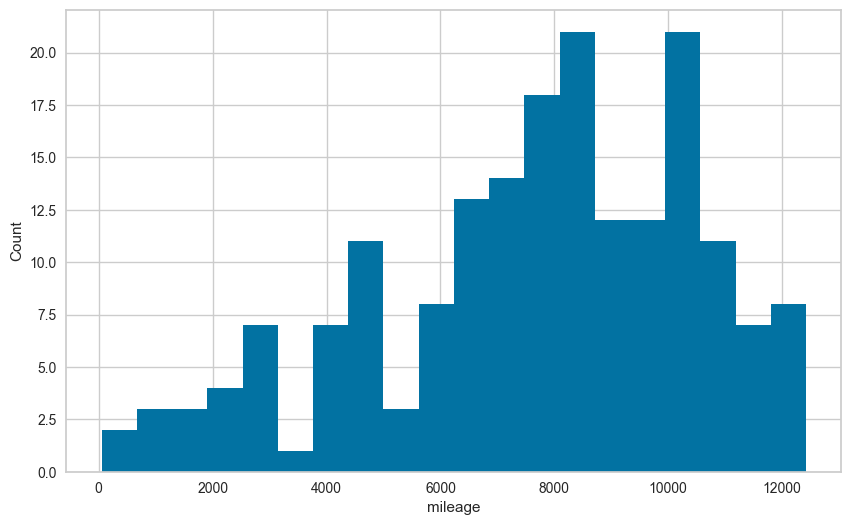

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

mileage.groupby("EquipmentID")["eng_time_to_derate"].max().hist(bins=20, figsize=(10, 6))
plt.xlabel("mileage")
plt.ylabel("Count")
plt.show()

In [20]:
# Begin RUL setup
# Select only rows up until first derate by EquipmentID
grouped = interpolated_drop.groupby("EquipmentID")

# Define a function to filter out rows after the first occurrence of spn=5246
def filter_rows(df):
    first_5246_index = df[df["spn"] == 5246].index.min()
    return df.loc[df.index <= first_5246_index]

# Apply the filter_rows function to each group
filtered = grouped.apply(filter_rows)

# Reset the index of the resulting dataframe
filtered = filtered.reset_index(drop=True)
filtered

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure
0,5713,1070644,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,4344,5,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527.0,0.000000,0.0,13.63
1,5714,1070646,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,5246,0,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527.0,0.000000,0.0,13.63
2,614,998928,2015-02-22 07:10:45,Condition Exists Cruise Control Enable Switch,unknown,unknown,49,596,31,126,1339,36.514861,-87.208888,100.0,14.5000,546450.1,186.8,26.0,40.02,189.4438,1400.875,10299.05,65.2,83573.338285,4.332435,183.2,True,82.4,255.0,66.991580,0.0,3.77
3,19329,1838684,2015-04-11 18:36:41,Condition Exists Cruise Control Enable Switch,unknown,unknown,0,4364,18,1,1339,36.693657,-82.011712,100.0,13.7025,558830.2,188.6,52.0,36.54,215.9937,1405.625,10555.35,72.0,85632.559430,9.153590,183.2,True,109.4,17407.0,67.078960,0.0,13.34
4,19611,1841891,2015-04-12 09:20:21,Low Voltage (Power Supply (obsolete)),unknown,unknown,11,627,4,127,1339,37.833564,-79.377314,100.0,13.7025,558830.2,188.6,52.0,36.54,215.9937,1405.625,10555.35,72.0,85632.559430,9.153590,183.2,True,109.4,1279.0,67.078960,0.0,13.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104594,1052848,60579160,2018-09-04 13:51:55,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,11,639,2,127,306,36.010601,-86.600416,32.0,14.5000,303686.6,183.2,37.0,35.38,193.9438,854.125,9366.40,100.0,42134.781864,2.311513,32.0,True,140.0,1279.0,4.417561,0.0,2.32
104595,1053620,60904453,2018-09-07 05:45:39,Data Drifted High Aftertreatment 1 Outlet NOx,6X1u13D1500000000,CMMNS,0,3226,20,1,306,36.167777,-86.529120,0.0,14.4275,303989.6,183.2,13.0,38.86,214.3062,1327.375,9388.30,64.0,42183.917866,1.492577,32.0,True,104.0,17407.0,65.399310,30.4,0.87
104596,1053622,60904613,2018-09-07 05:48:43,Condition Exists NOx limits exceeded due to In...,6X1u13D1500000000,CMMNS,0,4094,31,1,306,36.169907,-86.587731,0.0,14.4275,303992.9,185.0,85.0,38.28,212.2813,1319.750,9388.35,62.8,42184.182038,15.480530,32.0,True,116.6,18431.0,64.729400,0.0,21.46
104597,1053642,60909415,2018-09-07 06:47:05,Condition Exists Engine Protection Torque Derate,6X1u13D1500000000,CMMNS,0,1569,31,1,306,36.173240,-86.776990,0.0,14.5000,304007.1,183.2,14.0,23.20,193.3813,599.125,9389.15,67.2,42186.163328,0.515137,32.0,True,145.4,18431.0,0.000000,0.0,0.58


In [50]:
# compute remaining useful life (RUL) for desired metric
engine_time_rul = (filtered
    .groupby("EquipmentID", group_keys=False)
    .apply(lambda x: x.assign(RUL=x.loc[x["spn"] == 5246, "EngineTimeLtd"].iloc[0] - x["EngineTimeLtd"])))
engine_time_rul

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure,RUL
0,5713,1070644,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,4344,5,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527.0,0.000000,0.0,13.63,0.00
1,5714,1070646,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,5246,0,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527.0,0.000000,0.0,13.63,0.00
2,614,998928,2015-02-22 07:10:45,Condition Exists Cruise Control Enable Switch,unknown,unknown,49,596,31,126,1339,36.514861,-87.208888,100.0,14.5000,546450.1,186.8,26.0,40.02,189.4438,1400.875,10299.05,65.2,83573.338285,4.332435,183.2,True,82.4,255.0,66.991580,0.0,3.77,714.00
3,19329,1838684,2015-04-11 18:36:41,Condition Exists Cruise Control Enable Switch,unknown,unknown,0,4364,18,1,1339,36.693657,-82.011712,100.0,13.7025,558830.2,188.6,52.0,36.54,215.9937,1405.625,10555.35,72.0,85632.559430,9.153590,183.2,True,109.4,17407.0,67.078960,0.0,13.34,457.70
4,19611,1841891,2015-04-12 09:20:21,Low Voltage (Power Supply (obsolete)),unknown,unknown,11,627,4,127,1339,37.833564,-79.377314,100.0,13.7025,558830.2,188.6,52.0,36.54,215.9937,1405.625,10555.35,72.0,85632.559430,9.153590,183.2,True,109.4,1279.0,67.078960,0.0,13.34,457.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104594,1052848,60579160,2018-09-04 13:51:55,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,11,639,2,127,306,36.010601,-86.600416,32.0,14.5000,303686.6,183.2,37.0,35.38,193.9438,854.125,9366.40,100.0,42134.781864,2.311513,32.0,True,140.0,1279.0,4.417561,0.0,2.32,26.50
104595,1053620,60904453,2018-09-07 05:45:39,Data Drifted High Aftertreatment 1 Outlet NOx,6X1u13D1500000000,CMMNS,0,3226,20,1,306,36.167777,-86.529120,0.0,14.4275,303989.6,183.2,13.0,38.86,214.3062,1327.375,9388.30,64.0,42183.917866,1.492577,32.0,True,104.0,17407.0,65.399310,30.4,0.87,4.60
104596,1053622,60904613,2018-09-07 05:48:43,Condition Exists NOx limits exceeded due to In...,6X1u13D1500000000,CMMNS,0,4094,31,1,306,36.169907,-86.587731,0.0,14.4275,303992.9,185.0,85.0,38.28,212.2813,1319.750,9388.35,62.8,42184.182038,15.480530,32.0,True,116.6,18431.0,64.729400,0.0,21.46,4.55
104597,1053642,60909415,2018-09-07 06:47:05,Condition Exists Engine Protection Torque Derate,6X1u13D1500000000,CMMNS,0,1569,31,1,306,36.173240,-86.776990,0.0,14.5000,304007.1,183.2,14.0,23.20,193.3813,599.125,9389.15,67.2,42186.163328,0.515137,32.0,True,145.4,18431.0,0.000000,0.0,0.58,3.75


In [40]:
df_306 = engine_time_rul[engine_time_rul['EquipmentID'] == '306']

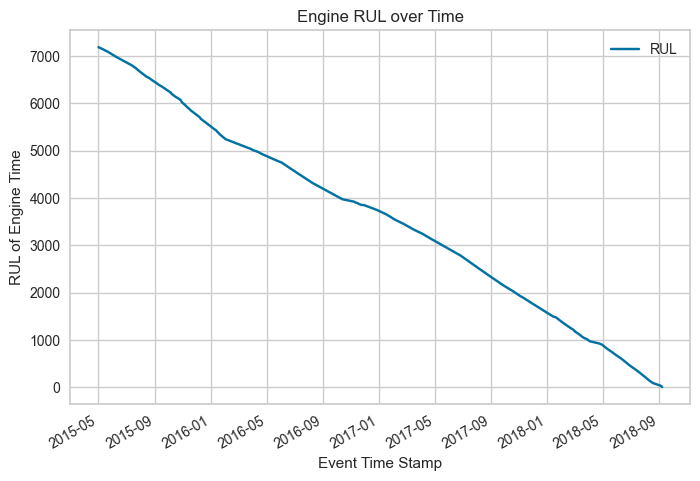

In [41]:
import matplotlib.pyplot as plt

df_306.plot(x="EventTimeStamp", y="RUL")
plt.xlabel("Event Time Stamp")
plt.ylabel("RUL of Engine Time")
plt.title("Engine RUL over Time")
plt.show()

In [42]:
engine_time_rul[engine_time_rul['EquipmentID']== '306']

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,...,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure,RUL
104483,39670,2189989,2015-05-01 01:36:53,Condition Exists Cruise Control Enable Switch,unknown,unknown,49,596,31,14,...,14834.845752,1.307656,32.0,True,89.6,255.0,65.661460,0.0,2.90,7191.85
104484,60843,2541396,2015-05-21 03:47:49,Condition Exists Cruise Control Enable Switch,unknown,unknown,49,596,31,15,...,15469.519107,18.610980,32.0,True,111.2,255.0,64.787660,0.0,29.00,7095.00
104485,74435,2750424,2015-06-03 02:28:44,Condition Exists Cruise Control Enable Switch,unknown,unknown,49,596,31,16,...,15975.804845,18.663810,32.0,True,116.6,255.0,65.797390,0.0,28.13,7018.05
104486,80339,2839271,2015-06-08 12:02:15,Condition Exists Cruise Control Enable Switch,unknown,unknown,49,596,31,17,...,16187.538744,0.634015,32.0,True,147.2,255.0,0.000000,0.0,0.58,6985.30
104487,119517,3430531,2015-07-13 00:04:58,Incorrect Data J1939 Network #1 Primary Vehicl...,unknown,unknown,11,639,2,127,...,17252.548372,1.466159,32.0,True,143.6,1279.0,4.262218,0.0,1.16,6803.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104594,1052848,60579160,2018-09-04 13:51:55,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,11,639,2,127,...,42134.781864,2.311513,32.0,True,140.0,1279.0,4.417561,0.0,2.32,26.50
104595,1053620,60904453,2018-09-07 05:45:39,Data Drifted High Aftertreatment 1 Outlet NOx,6X1u13D1500000000,CMMNS,0,3226,20,1,...,42183.917866,1.492577,32.0,True,104.0,17407.0,65.399310,30.4,0.87,4.60
104596,1053622,60904613,2018-09-07 05:48:43,Condition Exists NOx limits exceeded due to In...,6X1u13D1500000000,CMMNS,0,4094,31,1,...,42184.182038,15.480530,32.0,True,116.6,18431.0,64.729400,0.0,21.46,4.55
104597,1053642,60909415,2018-09-07 06:47:05,Condition Exists Engine Protection Torque Derate,6X1u13D1500000000,CMMNS,0,1569,31,1,...,42186.163328,0.515137,32.0,True,145.4,18431.0,0.000000,0.0,0.58,3.75


In [51]:
# Percent of time the RUL metric is 0
pt0 = len(engine_time_rul[engine_time_rul['RUL'] == 0])/len(engine_time_rul) * 100
print('Percent of time RUL at 0:', np.round(pt0,2), '%')

Percent of time RUL at 0: 1.46 %


In [52]:
# create binary column based on RUL threshold
engine_time_rul['RUL'] = [1 if out < 144 else 0 for out in engine_time_rul['RUL']]

In [53]:
pt0 = np.mean(engine_time_rul['RUL']) * 100
print('Percent of time RUL at 0:', np.round(pt0,2), '%')

Percent of time RUL at 0: 11.68 %


In [87]:
rul_ml = engine_time_rul.drop(columns=['ecuModel','ecuMake','EngineTimeLtd', 'Longitude', 'Latitude','activeTransitionCount','ecuSource','LampStatus','eventDescription','EventTimeStamp','RecordID', 'ESS_Id','spn','fmi'], axis=1)
rul_ml

,EquipmentID,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,Speed,Throttle,TurboBoostPressure,RUL
0,1329,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,70.0,72585.630126,5.111745,183.2,True,100.4,0.000000,0.0,13.63,1
1,1329,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,70.0,72585.630126,5.111745,183.2,True,100.4,0.000000,0.0,13.63,1
2,1339,100.0,14.5000,546450.1,186.8,26.0,40.02,189.4438,1400.875,65.2,83573.338285,4.332435,183.2,True,82.4,66.991580,0.0,3.77,0
3,1339,100.0,13.7025,558830.2,188.6,52.0,36.54,215.9937,1405.625,72.0,85632.559430,9.153590,183.2,True,109.4,67.078960,0.0,13.34,0
4,1339,100.0,13.7025,558830.2,188.6,52.0,36.54,215.9937,1405.625,72.0,85632.559430,9.153590,183.2,True,109.4,67.078960,0.0,13.34,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104594,306,32.0,14.5000,303686.6,183.2,37.0,35.38,193.9438,854.125,100.0,42134.781864,2.311513,32.0,True,140.0,4.417561,0.0,2.32,1
104595,306,0.0,14.4275,303989.6,183.2,13.0,38.86,214.3062,1327.375,64.0,42183.917866,1.492577,32.0,True,104.0,65.399310,30.4,0.87,1
104596,306,0.0,14.4275,303992.9,185.0,85.0,38.28,212.2813,1319.750,62.8,42184.182038,15.480530,32.0,True,116.6,64.729400,0.0,21.46,1
104597,306,0.0,14.5000,304007.1,183.2,14.0,23.20,193.3813,599.125,67.2,42186.163328,0.515137,32.0,True,145.4,0.000000,0.0,0.58,1


In [92]:
from pycaret.classification import *
from mlxtend.evaluate import GroupTimeSeriesSplit

# create time series split
split = int(len(rul_ml)*0.8)
train_data = rul_ml[:split]
test_data = rul_ml[split:]

# create group-wise time-series split
groups = train_data['EquipmentID']
tscv = GroupTimeSeriesSplit(n_splits=5, test_size=0.2)

# setup pycaret
clf = setup(data=train_data, target='RUL', session_id=123, fold_strategy='timeseries', fold=tscv, group=groups)

# train model on training data
models_to_exclude = ['lightgbm']
model = compare_models(exclude=models_to_exclude)

# predict on test data and evaluate performance
predictions = predict_model(model, data=test_data)
evaluate_model(model)

# plot feature importance
plot_model(model, plot='feature')

TypeError: setup() got an unexpected keyword argument 'group'

,Description,Value
0,Session id,123
1,Target,RUL
2,Target type,Binary
3,Original data shape,"(83679, 19)"
4,Transformed data shape,"(83679, 19)"
5,Transformed train set shape,"(58575, 19)"
6,Transformed test set shape,"(25104, 19)"
7,Ordinal features,1
8,Numeric features,16
9,Categorical features,2


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8718,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3370
lda,Linear Discriminant Analysis,0.8718,0.6363,0.0000,0.0000,0.0000,0.0000,0.0000,0.5300
dummy,Dummy Classifier,0.8718,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.8300
lr,Logistic Regression,0.8597,0.4865,0.0361,0.2373,0.0331,0.0196,0.0352,1.1520
et,Extra Trees Classifier,0.8495,0.7350,0.1072,0.2494,0.1087,0.0761,0.0815,1.3860
ada,Ada Boost Classifier,0.8459,0.6925,0.1633,0.2416,0.1689,0.1345,0.1431,1.1000
gbc,Gradient Boosting Classifier,0.8435,0.7045,0.1312,0.2230,0.1311,0.0927,0.1085,3.5880
qda,Quadratic Discriminant Analysis,0.8331,0.6096,0.1537,0.2371,0.1491,0.0901,0.0995,0.3850
rf,Random Forest Classifier,0.8302,0.7134,0.1334,0.1741,0.1123,0.0622,0.0647,1.9540
knn,K Neighbors Classifier,0.8282,0.6017,0.1703,0.2021,0.1473,0.0936,0.0953,0.8510


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.9289,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

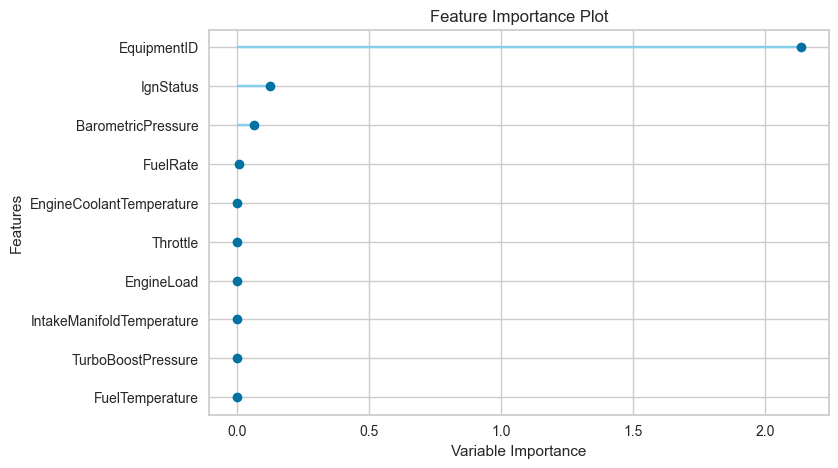

In [96]:
from sklearn.model_selection import GroupKFold
from pycaret.classification import *

# create time series split
split = int(len(rul_ml)*0.8)
train_data = rul_ml[:split]
test_data = rul_ml[split:]

# create group-wise time-series split
groups = train_data['EquipmentID']
gkf = GroupKFold(n_splits=5)

# setup pycaret
clf = setup(data=train_data, target='RUL', session_id=123, fold_strategy='groupkfold', fold_groups=groups)

# train model on training data
models_to_exclude = ['lightgbm']
model = compare_models(exclude=models_to_exclude)

# predict on test data and evaluate performance
predictions = predict_model(model, data=test_data)
evaluate_model(model)

# plot feature importance
plot_model(model, plot='feature')

,Description,Value
0,Session id,123
1,Target,RUL
2,Target type,Binary
3,Original data shape,"(83679, 18)"
4,Transformed data shape,"(83679, 18)"
5,Transformed train set shape,"(58575, 18)"
6,Transformed test set shape,"(25104, 18)"
7,Ordinal features,1
8,Numeric features,16
9,Categorical features,1


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9757,0.9870,0.8402,0.9656,0.8980,0.8843,0.8874,1.6580
catboost,CatBoost Classifier,0.9709,0.9835,0.8051,0.9614,0.8752,0.8589,0.8639,3.6030
rf,Random Forest Classifier,0.9662,0.9823,0.7496,0.9840,0.8496,0.8311,0.8416,1.3100
knn,K Neighbors Classifier,0.9657,0.9701,0.8391,0.8865,0.8618,0.8423,0.8429,0.5850
dt,Decision Tree Classifier,0.9653,0.9225,0.8651,0.8644,0.8646,0.8447,0.8448,0.3540
et,Extra Trees Classifier,0.9567,0.9711,0.6714,0.9870,0.7985,0.7752,0.7937,1.0520
gbc,Gradient Boosting Classifier,0.9500,0.9600,0.6248,0.9785,0.7625,0.7361,0.7593,1.8160
ada,Ada Boost Classifier,0.9329,0.9316,0.5217,0.9226,0.6662,0.6321,0.6641,0.5250
dummy,Dummy Classifier,0.8716,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4610
ridge,Ridge Classifier,0.8695,0.0000,0.0088,0.2682,0.0170,0.0088,0.0267,0.3330


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

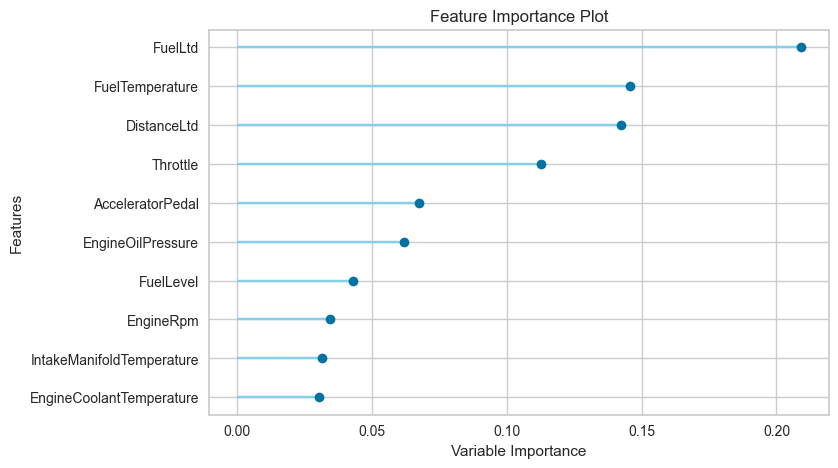

In [55]:
from pycaret.classification import *

# create time series split
split = int(len(rul_ml)*0.8)
train_data = rul_ml[:split]
test_data = rul_ml[split:]

# setup pycaret
clf = setup(data=train_data, target='RUL', session_id=123, fold_strategy='timeseries')

# train model
#model = create_model('gbc')
#best_model = compare_models()
models_to_exclude = ['lightgbm']

model=compare_models(exclude=models_to_exclude)

# plot feature importance
plot_model(model, plot='feature')

In [56]:
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [59]:
# No derate dataframe
no_derate = fault_diag.loc[~fault_diag['spn'].isin([5246])]

#Extract unique EquipmentID numbers from no_derate
unique_equip_ids = no_derate['EquipmentID'].unique()

#Filter rows in fault_diag based on unique_equip_ids
no_derate_filtered = no_derate[no_derate['EquipmentID'].isin(unique_equip_ids)]
no_derate_filtered = no_derate_filtered[no_derate_filtered['active'] == True]
no_derate_filtered

,RecordID,ESS_Id,EventTimeStamp,eventDescription,actionDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,...,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure
0,1,990349,2015-02-21 10:47:13.000,Low (Severity Low) Engine Coolant Level,NaN,unknown,unknown,unknown,unknown,0,...,NaN,False,78.8,1023,True,NaN,0,3276.75,NaN,0
1,2,990360,2015-02-21 11:34:34.000,NaN,NaN,unknown,unknown,unknown,unknown,11,...,NaN,True,NaN,1279,NaN,NaN,NaN,NaN,NaN,NaN
3,4,990370,2015-02-21 11:35:33.000,Incorrect Data Steering Wheel Angle,NaN,unknown,unknown,unknown,unknown,11,...,NaN,True,NaN,1279,NaN,NaN,NaN,NaN,NaN,NaN
5,6,990431,2015-02-21 11:40:22.000,Low (Severity Low) Engine Coolant Level,NaN,04993120*00025921*082113134117*07700053*I0*BBZ*,79466580,6X1u10D1500000000,CMMNS,0,...,NaN,True,111.2,1023,NaN,NaN,13.6022,3276.75,NaN,6.67
6,7,990439,2015-02-21 11:40:52.000,Low (Severity Low) Engine Coolant Level,NaN,unknown,unknown,unknown,unknown,0,...,NaN,True,78.8,1023,NaN,NaN,41.53478,3276.75,NaN,20.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051202,1248448,123899434,2020-03-06 13:12:43.000,High Voltage (Fuel Level),NaN,NaN,NaN,CECU3B-NAMUX4,PACCR,49,...,NaN,True,120.2,1279,False,NaN,0.9417657,NaN,100,1.16
1051205,1248452,123901805,2020-03-06 13:42:48.000,Low (Severity Medium) Engine Coolant Level,NaN,04358814*06030918*051718174436*09401683*G1*BDR*,79904453,6X1u13D1500000000,CMMNS,0,...,NaN,True,104,2047,False,NaN,5.932153,NaN,100,0.58
1051208,1248455,123905139,2020-03-06 14:04:23.000,Condition Exists Engine Protection Torque Derate,NaN,04358814*06099720*030816202706*09400153*G1*BDR*,79932020,6X1u13D1500000000,CMMNS,0,...,32,True,98.6,18431,False,NaN,65.01096,NaN,73.2,7.83
1051209,1248456,123905996,2020-03-06 14:13:38.000,Abnormal Rate of Change Aftertreatment 1 Intak...,NaN,05317106*05100987*050719120655*09401585*G1*BDR*,79880653,6X1u13D1500000000,CMMNS,0,...,NaN,True,91.4,17407,NaN,NaN,66.5741,NaN,100,6.96


In [60]:
no_derate_filtered = no_derate_filtered.sort_values(by=['EquipmentID','EventTimeStamp'], ascending=[True, True])
no_derate_filtered = no_derate_filtered.drop(columns=['ParkingBrake','LocationTimeStamp','active','CruiseControlActive', 'CruiseControlSetSpeed', 'MCTNumber', 'ecuSoftwareVersion', 'ecuSerialNumber','actionDescription', 'faultValue', 'ServiceDistance', 'SwitchedBatteryVoltage'])
no_derate_filtered

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,...,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure
37535,42689,2241022,2015-05-04 15:38:35.000,NaN,unknown,unknown,49,50353,0,2,...,NaN,78862.886425482,16.85423,NaN,True,113,2,64.68085,NaN,26.39
40253,45667,2296851,2015-05-07 06:52:14.000,Condition Exists Cruise Control Enable Switch,unknown,unknown,49,596,31,126,...,NaN,78990.877784676,0.7661014,NaN,True,102.2,255,0,NaN,1.74
51156,58809,2507532,2015-05-19 12:02:55.000,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u10D1500000000,CMMNS,0,3216,9,1,...,NaN,79274.466482498,0,NaN,True,109.4,17407,27.56364,NaN,2.9
57539,65879,2610228,2015-05-26 08:11:45.000,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u10D1500000000,CMMNS,0,3216,9,1,...,NaN,NaN,NaN,NaN,True,NaN,17407,NaN,NaN,NaN
57589,65939,2611189,2015-05-26 08:44:10.000,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u10D1500000000,CMMNS,0,3216,9,1,...,NaN,79275.39108468,4.530565,NaN,True,100.4,17407,28.79667,NaN,6.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024789,1214360,109664481,2019-11-12 00:24:39.000,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,11,639,2,127,...,65.2,44386.056091014,2.166218,NaN,True,102.2,1279,4.466105,100,2.61
3745,4246,1048627,2015-02-24 13:45:06.000,Low (Severity Low) Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,1761,17,43,...,38,11368.512171794,14.72764,32,True,82.4,1023,65.96243,47.2,16.82
3916,4428,1051023,2015-02-24 15:31:17.000,Low (Severity Medium) Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,1761,18,11,...,22,11390.042194032,9.166799,32,True,82.4,1023,66.83624,67.2,8.99
5829,6439,1089561,2015-02-26 13:12:11.000,NaN,6X1u13D1500000000,CMMNS,0,5848,9,1,...,22.4,11527.675833124,0.6604322,32,True,84.2,17407,2.058292,0,0.29


In [61]:
from datetime import datetime
no_derate_filtered['EventTimeStamp'] = pd.to_datetime(no_derate_filtered['EventTimeStamp'])
no_derate_filtered = no_derate_filtered.replace(',', '.', regex=True)

In [66]:
# Create a groupby object using the 'EquipmentID' column
groups2 = no_derate_filtered.groupby('EquipmentID')

# Define a function to apply to each group to interpolate missing values using ffill
def interpolate_group(group):
    return group.ffill()

# Apply the function to each group and concatenate the results back into a single DataFrame
interpolated2 = pd.concat([interpolate_group(group) for _, group in groups2])
interpolated2

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,...,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure
37535,42689,2241022,2015-05-04 15:38:35,NaN,unknown,unknown,49,50353,0,2,...,NaN,78862.886425482,16.85423,NaN,True,113,2,64.68085,NaN,26.39
40253,45667,2296851,2015-05-07 06:52:14,Condition Exists Cruise Control Enable Switch,unknown,unknown,49,596,31,126,...,NaN,78990.877784676,0.7661014,NaN,True,102.2,255,0,NaN,1.74
51156,58809,2507532,2015-05-19 12:02:55,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u10D1500000000,CMMNS,0,3216,9,1,...,NaN,79274.466482498,0,NaN,True,109.4,17407,27.56364,NaN,2.9
57539,65879,2610228,2015-05-26 08:11:45,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u10D1500000000,CMMNS,0,3216,9,1,...,NaN,79274.466482498,0,NaN,True,109.4,17407,27.56364,NaN,2.9
57589,65939,2611189,2015-05-26 08:44:10,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u10D1500000000,CMMNS,0,3216,9,1,...,NaN,79275.39108468,4.530565,NaN,True,100.4,17407,28.79667,NaN,6.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024789,1214360,109664481,2019-11-12 00:24:39,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,11,639,2,127,...,65.2,44386.056091014,2.166218,32,True,102.2,1279,4.466105,100,2.61
3745,4246,1048627,2015-02-24 13:45:06,Low (Severity Low) Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,1761,17,43,...,38,11368.512171794,14.72764,32,True,82.4,1023,65.96243,47.2,16.82
3916,4428,1051023,2015-02-24 15:31:17,Low (Severity Medium) Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,1761,18,11,...,22,11390.042194032,9.166799,32,True,82.4,1023,66.83624,67.2,8.99
5829,6439,1089561,2015-02-26 13:12:11,Low (Severity Medium) Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,5848,9,1,...,22.4,11527.675833124,0.6604322,32,True,84.2,17407,2.058292,0,0.29


In [67]:
# Create a groupby object using the 'EquipmentID' column
groups2 = interpolated2.groupby('EquipmentID')

# Define a function to apply to each group to interpolate missing values using ffill
def interpolate_group(group):
    return group.bfill()

# Apply the function to each group and concatenate the results back into a single DataFrame
interpolated_bfill2 = pd.concat([interpolate_group(group) for _, group in groups2])
interpolated_bfill2

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,...,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure
37535,42689,2241022,2015-05-04 15:38:35,Condition Exists Cruise Control Enable Switch,unknown,unknown,49,50353,0,2,...,NaN,78862.886425482,16.85423,NaN,True,113,2,64.68085,NaN,26.39
40253,45667,2296851,2015-05-07 06:52:14,Condition Exists Cruise Control Enable Switch,unknown,unknown,49,596,31,126,...,NaN,78990.877784676,0.7661014,NaN,True,102.2,255,0,NaN,1.74
51156,58809,2507532,2015-05-19 12:02:55,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u10D1500000000,CMMNS,0,3216,9,1,...,NaN,79274.466482498,0,NaN,True,109.4,17407,27.56364,NaN,2.9
57539,65879,2610228,2015-05-26 08:11:45,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u10D1500000000,CMMNS,0,3216,9,1,...,NaN,79274.466482498,0,NaN,True,109.4,17407,27.56364,NaN,2.9
57589,65939,2611189,2015-05-26 08:44:10,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u10D1500000000,CMMNS,0,3216,9,1,...,NaN,79275.39108468,4.530565,NaN,True,100.4,17407,28.79667,NaN,6.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024789,1214360,109664481,2019-11-12 00:24:39,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,11,639,2,127,...,65.2,44386.056091014,2.166218,32,True,102.2,1279,4.466105,100,2.61
3745,4246,1048627,2015-02-24 13:45:06,Low (Severity Low) Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,1761,17,43,...,38,11368.512171794,14.72764,32,True,82.4,1023,65.96243,47.2,16.82
3916,4428,1051023,2015-02-24 15:31:17,Low (Severity Medium) Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,1761,18,11,...,22,11390.042194032,9.166799,32,True,82.4,1023,66.83624,67.2,8.99
5829,6439,1089561,2015-02-26 13:12:11,Low (Severity Medium) Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,5848,9,1,...,22.4,11527.675833124,0.6604322,32,True,84.2,17407,2.058292,0,0.29


In [68]:
interpolated_bfill2.isnull().sum()

RecordID                          0
ESS_Id                            0
EventTimeStamp                    0
eventDescription                  8
ecuModel                         63
ecuMake                          63
ecuSource                         0
spn                               0
fmi                               0
activeTransitionCount             0
EquipmentID                       0
Latitude                          0
Longitude                         0
AcceleratorPedal              24270
BarometricPressure                0
DistanceLtd                       0
EngineCoolantTemperature          0
EngineLoad                        0
EngineOilPressure                 0
EngineOilTemperature              0
EngineRpm                         0
EngineTimeLtd                  3765
FuelLevel                     18837
FuelLtd                           0
FuelRate                          0
FuelTemperature              188241
IgnStatus                         0
IntakeManifoldTemperature   

In [69]:
interpolated_bfill2 = interpolated_bfill2.bfill()

# Define columns to impute with mode
cols_to_impute = ['ecuModel', 'ecuMake', 'AcceleratorPedal', 'EngineTimeLtd', 'FuelLevel', 'FuelTemperature', 'Throttle']

# Group by EquipmentID and impute missing values with mode
grouped = interpolated_bfill2.groupby('EquipmentID')[cols_to_impute].apply(lambda x: x.fillna(x.mode().iloc[0]))

# Update the original DataFrame with imputed values
interpolated_bfill2[cols_to_impute] = grouped[cols_to_impute]
interpolated_bfill2

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,...,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure
37535,42689,2241022,2015-05-04 15:38:35,Condition Exists Cruise Control Enable Switch,unknown,unknown,49,50353,0,2,...,94,78862.886425482,16.85423,75.2,True,113,2,64.68085,100,26.39
40253,45667,2296851,2015-05-07 06:52:14,Condition Exists Cruise Control Enable Switch,unknown,unknown,49,596,31,126,...,94,78990.877784676,0.7661014,75.2,True,102.2,255,0,100,1.74
51156,58809,2507532,2015-05-19 12:02:55,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u10D1500000000,CMMNS,0,3216,9,1,...,94,79274.466482498,0,75.2,True,109.4,17407,27.56364,100,2.9
57539,65879,2610228,2015-05-26 08:11:45,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u10D1500000000,CMMNS,0,3216,9,1,...,94,79274.466482498,0,75.2,True,109.4,17407,27.56364,100,2.9
57589,65939,2611189,2015-05-26 08:44:10,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u10D1500000000,CMMNS,0,3216,9,1,...,94,79275.39108468,4.530565,75.2,True,100.4,17407,28.79667,100,6.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024789,1214360,109664481,2019-11-12 00:24:39,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,11,639,2,127,...,65.2,44386.056091014,2.166218,32,True,102.2,1279,4.466105,100,2.61
3745,4246,1048627,2015-02-24 13:45:06,Low (Severity Low) Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,1761,17,43,...,38,11368.512171794,14.72764,32,True,82.4,1023,65.96243,47.2,16.82
3916,4428,1051023,2015-02-24 15:31:17,Low (Severity Medium) Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,1761,18,11,...,22,11390.042194032,9.166799,32,True,82.4,1023,66.83624,67.2,8.99
5829,6439,1089561,2015-02-26 13:12:11,Low (Severity Medium) Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,5848,9,1,...,22.4,11527.675833124,0.6604322,32,True,84.2,17407,2.058292,0,0.29


In [72]:
int_cols = ["AcceleratorPedal", "BarometricPressure", "DistanceLtd", "EngineCoolantTemperature", "EngineLoad",
            "EngineOilPressure", "EngineOilTemperature", "EngineRpm", "EngineTimeLtd", "FuelLevel", "FuelLtd",
            "FuelRate", "FuelTemperature", "IntakeManifoldTemperature", "LampStatus", "Speed", "Throttle",
            "TurboBoostPressure"]

# convert columns to int64
interpolated_bfill2[int_cols] = interpolated_bfill2[int_cols].astype("float")

In [73]:
interpolated_bfill2

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure
37535,42689,2241022,2015-05-04 15:38:35,Condition Exists Cruise Control Enable Switch,unknown,unknown,49,50353,0,2,1327,35.988750,-83.579583,100.0,14.2825,517711.80,183.2,90.0,33.64,216.6125,1359.125,10323.10,94.0,78862.886425,16.854230,75.2,True,113.0,2.0,64.680850,100.0,26.39
40253,45667,2296851,2015-05-07 06:52:14,Condition Exists Cruise Control Enable Switch,unknown,unknown,49,596,31,126,1327,40.197500,-74.661435,0.0,14.7900,518554.70,185.0,14.0,25.52,165.8750,648.375,10338.70,94.0,78990.877785,0.766101,75.2,True,102.2,255.0,0.000000,100.0,1.74
51156,58809,2507532,2015-05-19 12:02:55,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u10D1500000000,CMMNS,0,3216,9,1,1327,35.491250,-86.458842,11.6,14.3550,520309.60,185.0,0.0,31.90,203.8438,1083.125,10374.80,94.0,79274.466482,0.000000,75.2,True,109.4,17407.0,27.563640,100.0,2.90
57539,65879,2610228,2015-05-26 08:11:45,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u10D1500000000,CMMNS,0,3216,9,1,1327,35.490787,-86.433842,11.6,14.3550,520309.60,185.0,0.0,31.90,203.8438,1083.125,10374.80,94.0,79274.466482,0.000000,75.2,True,109.4,17407.0,27.563640,100.0,2.90
57589,65939,2611189,2015-05-26 08:44:10,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u10D1500000000,CMMNS,0,3216,9,1,1327,35.523703,-86.440787,48.8,14.3550,520314.60,161.6,45.0,38.86,154.5125,1170.000,10375.15,94.0,79275.391085,4.530565,75.2,True,100.4,17407.0,28.796670,100.0,6.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024789,1214360,109664481,2019-11-12 00:24:39,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,11,639,2,127,310,35.271666,-86.397361,32.4,14.3550,327738.30,185.0,16.0,40.02,198.2750,1212.625,9940.35,65.2,44386.056091,2.166218,32.0,True,102.2,1279.0,4.466105,100.0,2.61
3745,4246,1048627,2015-02-24 13:45:06,Low (Severity Low) Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,1761,17,43,R1762,41.254166,-85.088888,0.0,14.0650,79796.12,185.0,83.0,42.34,222.6875,1333.250,1527.45,38.0,11368.512172,14.727640,32.0,True,82.4,1023.0,65.962430,47.2,16.82
3916,4428,1051023,2015-02-24 15:31:17,Low (Severity Medium) Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,1761,18,11,R1762,39.944444,-86.016990,0.0,14.1375,79913.24,179.6,53.0,42.34,222.6875,1352.875,1529.25,22.0,11390.042194,9.166799,32.0,True,82.4,1023.0,66.836240,67.2,8.99
5829,6439,1089561,2015-02-26 13:12:11,Low (Severity Medium) Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,5848,9,1,R1762,39.952870,-81.936990,0.0,14.2100,80838.70,134.6,11.0,38.86,148.7188,595.750,1547.55,22.4,11527.675833,0.660432,32.0,True,84.2,17407.0,2.058292,0.0,0.29


In [78]:
interpolated_bfill['DistanceLtd'].max()

636496.4

In [85]:
import pandas as pd

# Load your data into a pandas DataFrame (assuming your data is stored in a CSV file)
#interpolated_bfill2 = pd.read_csv('your_data_file.csv')

# Create a new DataFrame to hold the results
results_df = pd.DataFrame()

# Loop through each unique EquipmentID
for equipment_id in interpolated_bfill2['EquipmentID'].unique():

    # Filter the DataFrame to only include rows with the current EquipmentID
    equipment_id_df = interpolated_bfill2[interpolated_bfill2['EquipmentID'] == equipment_id]
    
    # Calculate the max DistanceLtd for the current EquipmentID and store it in a new column
    max_distance_ltd = equipment_id_df['DistanceLtd'].max()
    equipment_id_df['MaxDistanceLtd'] = max_distance_ltd
    
    # Append the equipment_id_df to the results_df
    results_df = results_df.append(equipment_id_df)
    
# Calculate the overall average of max DistanceLtd per EquipmentID and store it in a new column
overall_avg_max_distance_ltd = results_df['MaxDistanceLtd'].mean()
results_df['OverallAvgMaxDistanceLtd'] = overall_avg_max_distance_ltd

# Print the results DataFrame
results_df

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure,MaxDistanceLtd,OverallAvgMaxDistanceLtd
37535,42689,2241022,2015-05-04 15:38:35,Condition Exists Cruise Control Enable Switch,unknown,unknown,49,50353,0,2,1327,35.988750,-83.579583,100.0,14.2825,517711.80,183.2,90.0,33.64,216.6125,1359.125,10323.10,94.0,78862.886425,16.854230,75.2,True,113.0,2.0,64.680850,100.0,26.39,520314.60,518653.91872
40253,45667,2296851,2015-05-07 06:52:14,Condition Exists Cruise Control Enable Switch,unknown,unknown,49,596,31,126,1327,40.197500,-74.661435,0.0,14.7900,518554.70,185.0,14.0,25.52,165.8750,648.375,10338.70,94.0,78990.877785,0.766101,75.2,True,102.2,255.0,0.000000,100.0,1.74,520314.60,518653.91872
51156,58809,2507532,2015-05-19 12:02:55,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u10D1500000000,CMMNS,0,3216,9,1,1327,35.491250,-86.458842,11.6,14.3550,520309.60,185.0,0.0,31.90,203.8438,1083.125,10374.80,94.0,79274.466482,0.000000,75.2,True,109.4,17407.0,27.563640,100.0,2.90,520314.60,518653.91872
57539,65879,2610228,2015-05-26 08:11:45,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u10D1500000000,CMMNS,0,3216,9,1,1327,35.490787,-86.433842,11.6,14.3550,520309.60,185.0,0.0,31.90,203.8438,1083.125,10374.80,94.0,79274.466482,0.000000,75.2,True,109.4,17407.0,27.563640,100.0,2.90,520314.60,518653.91872
57589,65939,2611189,2015-05-26 08:44:10,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u10D1500000000,CMMNS,0,3216,9,1,1327,35.523703,-86.440787,48.8,14.3550,520314.60,161.6,45.0,38.86,154.5125,1170.000,10375.15,94.0,79275.391085,4.530565,75.2,True,100.4,17407.0,28.796670,100.0,6.67,520314.60,518653.91872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024789,1214360,109664481,2019-11-12 00:24:39,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,11,639,2,127,310,35.271666,-86.397361,32.4,14.3550,327738.30,185.0,16.0,40.02,198.2750,1212.625,9940.35,65.2,44386.056091,2.166218,32.0,True,102.2,1279.0,4.466105,100.0,2.61,327738.30,518653.91872
3745,4246,1048627,2015-02-24 13:45:06,Low (Severity Low) Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,1761,17,43,R1762,41.254166,-85.088888,0.0,14.0650,79796.12,185.0,83.0,42.34,222.6875,1333.250,1527.45,38.0,11368.512172,14.727640,32.0,True,82.4,1023.0,65.962430,47.2,16.82,80838.70,518653.91872
3916,4428,1051023,2015-02-24 15:31:17,Low (Severity Medium) Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,1761,18,11,R1762,39.944444,-86.016990,0.0,14.1375,79913.24,179.6,53.0,42.34,222.6875,1352.875,1529.25,22.0,11390.042194,9.166799,32.0,True,82.4,1023.0,66.836240,67.2,8.99,80838.70,518653.91872
5829,6439,1089561,2015-02-26 13:12:11,Low (Severity Medium) Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,5848,9,1,R1762,39.952870,-81.936990,0.0,14.2100,80838.70,134.6,11.0,38.86,148.7188,595.750,1547.55,22.4,11527.675833,0.660432,32.0,True,84.2,17407.0,2.058292,0.0,0.29,80838.70,518653.91872


In [86]:
import pandas as pd

# Load your data into a pandas DataFrame (assuming your data is stored in a CSV file)
#interpolated_bfill2 = pd.read_csv('your_data_file.csv')

# Convert the EventTimeStamp column to datetime format
#interpolated_bfill2['EventTimeStamp'] = pd.to_datetime(interpolated_bfill2['EventTimeStamp'])

# Create a new DataFrame to hold the results
#results_df = pd.DataFrame()

# Loop through each unique EquipmentID
for equipment_id in results_df['EquipmentID'].unique():

    # Filter the DataFrame to only include rows with the current EquipmentID
    equipment_id_df = results_df[results_df['EquipmentID'] == equipment_id]
    
    # Calculate the number of days between the min and max time for the current EquipmentID
    max_time = equipment_id_df['EventTimeStamp'].max()
    min_time = equipment_id_df['EventTimeStamp'].min()
    num_days = (max_time - min_time).days
    equipment_id_df['NumDays'] = num_days
    
    # Append the equipment_id_df to the results_df
    results_df = results_df.append(equipment_id_df)
    
# Calculate the overall average of number of days and store it in a new column
overall_avg_num_days = results_df['NumDays'].mean()
results_df['OverallAvgNumDays'] = overall_avg_num_days

# Print the results DataFrame
results_df

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure,MaxDistanceLtd,OverallAvgMaxDistanceLtd,NumDays,OverallAvgNumDays
37535,42689,2241022,2015-05-04 15:38:35,Condition Exists Cruise Control Enable Switch,unknown,unknown,49,50353,0,2,1327,35.988750,-83.579583,100.0,14.2825,517711.80,183.2,90.0,33.64,216.6125,1359.125,10323.10,94.0,78862.886425,16.854230,75.2,True,113.0,2.0,64.680850,100.0,26.39,520314.60,518653.91872,NaN,1288.309825
40253,45667,2296851,2015-05-07 06:52:14,Condition Exists Cruise Control Enable Switch,unknown,unknown,49,596,31,126,1327,40.197500,-74.661435,0.0,14.7900,518554.70,185.0,14.0,25.52,165.8750,648.375,10338.70,94.0,78990.877785,0.766101,75.2,True,102.2,255.0,0.000000,100.0,1.74,520314.60,518653.91872,NaN,1288.309825
51156,58809,2507532,2015-05-19 12:02:55,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u10D1500000000,CMMNS,0,3216,9,1,1327,35.491250,-86.458842,11.6,14.3550,520309.60,185.0,0.0,31.90,203.8438,1083.125,10374.80,94.0,79274.466482,0.000000,75.2,True,109.4,17407.0,27.563640,100.0,2.90,520314.60,518653.91872,NaN,1288.309825
57539,65879,2610228,2015-05-26 08:11:45,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u10D1500000000,CMMNS,0,3216,9,1,1327,35.490787,-86.433842,11.6,14.3550,520309.60,185.0,0.0,31.90,203.8438,1083.125,10374.80,94.0,79274.466482,0.000000,75.2,True,109.4,17407.0,27.563640,100.0,2.90,520314.60,518653.91872,NaN,1288.309825
57589,65939,2611189,2015-05-26 08:44:10,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u10D1500000000,CMMNS,0,3216,9,1,1327,35.523703,-86.440787,48.8,14.3550,520314.60,161.6,45.0,38.86,154.5125,1170.000,10375.15,94.0,79275.391085,4.530565,75.2,True,100.4,17407.0,28.796670,100.0,6.67,520314.60,518653.91872,NaN,1288.309825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024789,1214360,109664481,2019-11-12 00:24:39,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,11,639,2,127,310,35.271666,-86.397361,32.4,14.3550,327738.30,185.0,16.0,40.02,198.2750,1212.625,9940.35,65.2,44386.056091,2.166218,32.0,True,102.2,1279.0,4.466105,100.0,2.61,327738.30,518653.91872,1724.0,1288.309825
3745,4246,1048627,2015-02-24 13:45:06,Low (Severity Low) Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,1761,17,43,R1762,41.254166,-85.088888,0.0,14.0650,79796.12,185.0,83.0,42.34,222.6875,1333.250,1527.45,38.0,11368.512172,14.727640,32.0,True,82.4,1023.0,65.962430,47.2,16.82,80838.70,518653.91872,1.0,1288.309825
3916,4428,1051023,2015-02-24 15:31:17,Low (Severity Medium) Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,1761,18,11,R1762,39.944444,-86.016990,0.0,14.1375,79913.24,179.6,53.0,42.34,222.6875,1352.875,1529.25,22.0,11390.042194,9.166799,32.0,True,82.4,1023.0,66.836240,67.2,8.99,80838.70,518653.91872,1.0,1288.309825
5829,6439,1089561,2015-02-26 13:12:11,Low (Severity Medium) Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,5848,9,1,R1762,39.952870,-81.936990,0.0,14.2100,80838.70,134.6,11.0,38.86,148.7188,595.750,1547.55,22.4,11527.675833,0.660432,32.0,True,84.2,17407.0,2.058292,0.0,0.29,80838.70,518653.91872,1.0,1288.309825
